In [1]:
#load packages and set file paths.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_loc = r"C:\Users\me\Documents\datasets\claim_train.csv"
test_loc = r"C:\Users\me\Documents\datasets\claim_test.csv"

In [2]:
train = pd.read_csv(train_loc)
test = pd.read_csv(test_loc)
data = pd.concat([train,test])

print (train.shape, test.shape, data.shape)

(614, 13) (367, 12) (981, 13)


In [3]:
#we're working with a dataset with under 1000 samples.
#let's take a look at the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [4]:
data.head()


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [5]:
data.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,NaN,NaN,NaN
50%,3800.000000,1110.000000,NaN,NaN,NaN
75%,5516.000000,2365.000000,NaN,NaN,NaN
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [6]:
#check the distribution of the target variable Loan_Status
train.Loan_Status.value_counts()

#68.7% of loans are approved by the company. [(422/614)*100=68.7%]

Y    422
N    192
Name: Loan_Status, dtype: int64

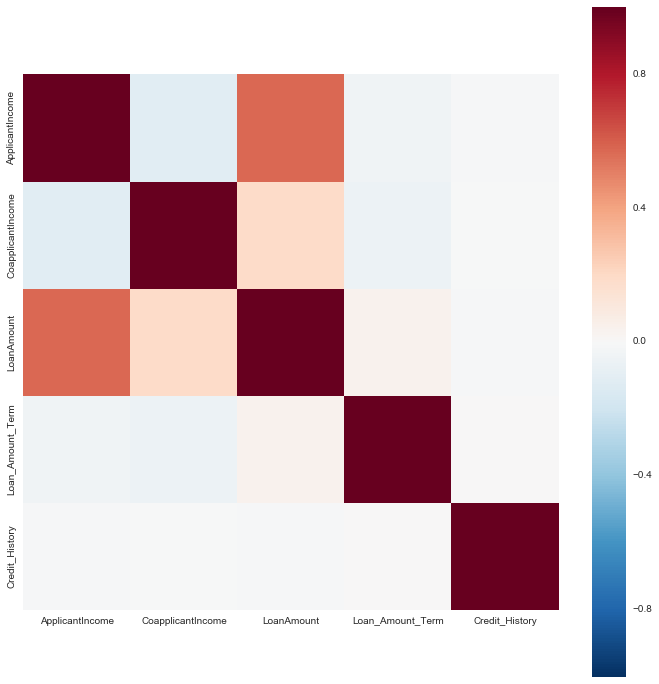

In [7]:
#check the correlation of the numerical feautres

corr = train.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#unsuprisingly applicant income and coapplicant income are positively correlated
#with loan amount.
plt.show()

In [8]:
#check amount of unique values in data.
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
dtype: int64

In [9]:
#check for NaNs.
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [17]:
print (sum(train.Credit_History.isnull()), sum(test.Credit_History.isnull()))

0 0


In [15]:
#We have 79 nulls in the Credit History column. They are spread between both
#the train and the test set. Let's change the column to a column of string
#type with values 'Yes', 'No', 'Unknown'.

replace_dict = {1.0:'Yes', 0.0:'No'}

train.Credit_History = train.Credit_History.replace(replace_dict)
test.Credit_History = test.Credit_History.replace(replace_dict)
train.Credit_History = train.Credit_History.fillna('Unknown')
test.Credit_History = test.Credit_History.fillna('Unknown')

In [16]:
print (sum(train.Dependents.isnull()), sum(test.Dependents.isnull()))

13 11


In [18]:
#There are 25 nulls in the Dependents column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Credit History column.

replace_dict = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(replace_dict)
test.Dependents = test.Dependents.replace(replace_dict)
train.Dependents = train.Dependents.fillna('Unknown')
test.Dependents = test.Dependents.fillna('Unknown')

In [19]:
print (sum(train.Gender.isnull()), sum(test.Gender.isnull()))

13 11


In [20]:
#There are 24 nulls in the Gender column. They are spread between both
#the train and the test set. Let's replace them with a string value again.

train.Gender = train.Gender.fillna('Unknown')
test.Gender = test.Gender.fillna('Unknown')

In [21]:
print (sum(train.Self_Employed.isnull()), sum(test.Self_Employed.isnull()))

32 23


In [22]:
#There are 24 nulls in the Self_Employed column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Self_Employed column.

train.Self_Employed = train.Self_Employed.fillna('Unknown')
test.Self_Employed = test.Self_Employed.fillna('Unknown')

In [25]:
print (sum(train.Married.isnull()), sum(test.Married.isnull()))

0 0


In [24]:
#There are 3 nulls in the Married column. Only the train set contains null values.
#This is not a problem. However, one must remember to take extra caution when creating dummy
#variables prior to feeding the data into models.

train.Married = train.Married.fillna('Unknown')

In [26]:
print (sum(train.Loan_Amount_Term.isnull()), sum(test.Loan_Amount_Term.isnull()))

14 6


In [27]:
#There are 20 nulls in the Loan_Amount_Term column. Replace them with mean values
#for each differnt group (based on the categorical columns).

train.Loan_Amount_Term = train.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                        'Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(
                                            lambda x: x.fillna(x.mean()))

test.Loan_Amount_Term = test.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                        'Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(
                                            lambda x: x.fillna(x.mean()))

In [29]:
print (sum(train.LoanAmount.isnull()), sum(test.LoanAmount.isnull()))

22 5


In [30]:
#There are also null values in the loan amount column. Repeat the process used above.

train.LoanAmount = train.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                  'Married','Property_Area', 'Self_Employed']).LoanAmount.transform(
                                            lambda x: x.fillna(x.mean()))

test.LoanAmount = test.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                'Married','Property_Area', 'Self_Employed']).LoanAmount.transform(
                                            lambda x: x.fillna(x.mean()))

In [32]:
inds = pd.isnull(train).any(1).nonzero()[0]
inds2 = pd.isnull(test).any(1).nonzero()[0]
print (inds, inds2)

[  0  19  35  36  44  45  63  73  81  95 102 103 112 113 127 165 197 202
 223 232 284 305 322 335 338 367 387 421 423 435 437 479 524 550 551 605] [ 45  48  78 101 117 129 184 188 214 247 289]


In [33]:
#We can see that are still some NaNs left. Let's fill them in with the average
#for the column.

train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [34]:
data = pd.concat([train, test])

data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [ ]:
#Excellent. Now the only null values in our data set are the target values we
#aim to predict. Let's save the train and test sets as separate CSV files and start
#a new python file.

train.to_csv('claim_train2.csv', index=False)
test.to_csv('claim_test2.csv', index=False)